In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px

%matplotlib inline


In [2]:
df = pd.read_csv("C:/Users/NasraRage/Downloads/Open_Geo_Data.csv")
df_1 = pd.read_csv("C:/Users/NasraRage/Downloads/Order_Data.csv")
df_2 = pd.read_csv("C:/Users/NasraRage/Downloads/Null_Data.csv")

In [3]:
df

,Unnamed: 0,status,usertype,country,latitude,longitude
0,0,terminated,small,Scotland,57.102554,-2.246308
1,1,terminated,small,Scotland,57.100556,-2.248342
2,2,terminated,small,Scotland,57.084444,-2.255708
3,3,terminated,large,Scotland,57.096656,-2.258102
4,4,terminated,large,Scotland,57.097085,-2.267513
...,...,...,...,...,...,...
1048570,1048570,live,small,England,52.192571,0.773744
1048571,1048571,live,small,England,52.194831,0.771338
1048572,1048572,terminated,large,England,52.245954,0.711453
1048573,1048573,terminated,small,England,52.189405,0.773766


In [4]:
df.drop(['Unnamed: 0', 'usertype'], axis=1, inplace=True)

In [5]:
df

,status,country,latitude,longitude
0,terminated,Scotland,57.102554,-2.246308
1,terminated,Scotland,57.100556,-2.248342
2,terminated,Scotland,57.084444,-2.255708
3,terminated,Scotland,57.096656,-2.258102
4,terminated,Scotland,57.097085,-2.267513
...,...,...,...,...
1048570,live,England,52.192571,0.773744
1048571,live,England,52.194831,0.771338
1048572,terminated,England,52.245954,0.711453
1048573,terminated,England,52.189405,0.773766


In [6]:
df_1

,Unnamed: 0,Order Number,Toothbrush Type,Order Date,Customer Age,Order Quantity,Delivery Postcode,Billing Postcode,Dispatched Date
0,2,BRU00008982,Toothbrush 4000,2022-12-05,13,3,DY1 204SN,CF38 1HN,2022-12-05
1,7,BRU00009666,Toothbrush 2000,2022-12-05,65,3,DL15 209LR,AL6 0TJ,2022-12-05
2,9,BRU00008813,Toothbrush 4000,2022-12-05,39,5,B21 200HJ,CF62 3LT,2022-12-06
3,10,BRU00009087,Toothbrush 2000,2022-12-04,68,7,E8 203BS,EH49 7QS,2022-12-05
4,12,BRU00009300,Toothbrush 4000,2022-12-04,27,8,HU14 203HT,FY6 0PT,2022-12-05
...,...,...,...,...,...,...,...,...,...
345,1020,BRU00004897,Toothbrush 2000,2022-12-04,65,3,DN41 7QA,DN41 7QA,2022-12-04
346,1021,BRU00006039,Toothbrush 4000,2022-12-05,6,4,BH19 3AX,BH19 3AX,2022-12-05
347,1022,BRU00001620,Toothbrush 2000,2022-12-04,79,8,DY13 8JQ,DY13 8JQ,2022-12-04
348,1023,BRU00006053,Toothbrush 2000,2022-12-03,70,4,DG6 4QA,DG6 4QA,2022-12-03


In [7]:
df_1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df_2

,Unnamed: 0,Order Number,Toothbrush Type,Order Date,Customer Age,Order Quantity,Delivery Postcode,Billing Postcode,Dispatched Date
0,0,BRU00008854,Toothbrush 4000,2022-12-05,15,4,DE24 209LQ,BB5 5HN,2022-12-05
1,1,BRU00009471,Toothbrush 2000,2022-12-05,77,1,CO1 202SZ,CW5 8PL,2022-12-05
2,2,BRU00008757,Toothbrush 2000,2022-12-04,76,4,AB11 208LG,CT9 2PA,2022-12-04
3,3,BRU00009462,Toothbrush 2000,2022-12-05,78,6,GU14 207JW,EH52 6HE,2022-12-05
4,4,BRU00009350,Toothbrush 2000,2022-12-04,63,9,HD1 205BY,DY4 7EJ,2022-12-04
...,...,...,...,...,...,...,...,...,...
670,670,BRU00009339,Toothbrush 4000,2022-12-04,26,6,DH9 8HG,DH9 8HG,2022-12-04
671,671,BRU00009244,Toothbrush 2000,2022-12-04,59,2,EH51 9LZ,EH51 9LZ,2022-12-04
672,672,BRU00009469,Toothbrush 2000,2022-12-04,90,5,DY14 8HG,DY14 8HG,2022-12-04
673,673,BRU00009117,Toothbrush 2000,2022-12-05,73,3,CV13 6HU,CV13 6HU,2022-12-05


In [9]:
df_2.drop(['Unnamed: 0'], axis=1, inplace=True)


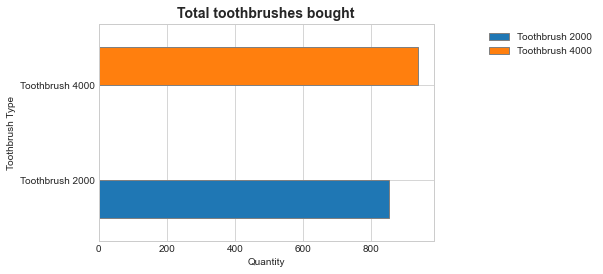

In [25]:
# total toothbrushes bought 
df_1.pivot_table(index='Toothbrush Type', columns='Toothbrush Type', aggfunc=np.sum).plot(kind='barh', edgecolor='grey', y='Order Quantity',
                                                         width = 0.8
                                                                                     
)
plt.xlabel('Quantity', fontsize=10)
plt.ylabel('Toothbrush Type', fontsize=10)
plt.title('Total toothbrushes bought', weight = 'bold', fontsize = 14)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.savefig('Toothbrush_Sales.png', bbox_inches='tight', dpi=150, facecolor=(1,1,1))
plt.show() 

This bar chart shows the total amount of toothbrushes bought by type. Toothbrush 4000 is more popular compared to Toothbrush 2000

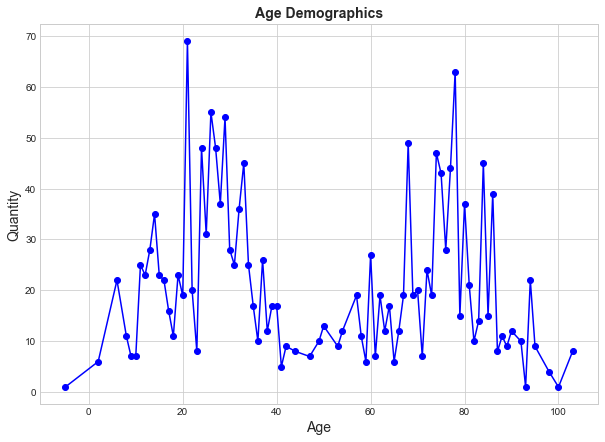

In [26]:
#creating line graph to provide information on the age range of who bought the toothbrush products
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize =(10,7)) # changing the size
plt.plot(df_1.groupby(['Customer Age'])['Order Quantity'].sum(), color='blue', marker='o') 
plt.title('Age Demographics', fontsize=14, weight = 'bold') 
plt.xlabel('Age', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.savefig('Total_Quantity_By_Age.png', bbox_inches='tight', dpi= 150, facecolor=(1,1,1))
plt.grid(True)
plt.show()

This line graph shows the quantity of products bought by age. Ages between 20-30 have bought more products compared to customers aged 40-60.

In [12]:
df_1.head()

,Order Number,Toothbrush Type,Order Date,Customer Age,Order Quantity,Delivery Postcode,Billing Postcode,Dispatched Date
0,BRU00008982,Toothbrush 4000,2022-12-05,13,3,DY1 204SN,CF38 1HN,2022-12-05
1,BRU00009666,Toothbrush 2000,2022-12-05,65,3,DL15 209LR,AL6 0TJ,2022-12-05
2,BRU00008813,Toothbrush 4000,2022-12-05,39,5,B21 200HJ,CF62 3LT,2022-12-06
3,BRU00009087,Toothbrush 2000,2022-12-04,68,7,E8 203BS,EH49 7QS,2022-12-05
4,BRU00009300,Toothbrush 4000,2022-12-04,27,8,HU14 203HT,FY6 0PT,2022-12-05


In [13]:
df.head()

,status,country,latitude,longitude
0,terminated,Scotland,57.102554,-2.246308
1,terminated,Scotland,57.100556,-2.248342
2,terminated,Scotland,57.084444,-2.255708
3,terminated,Scotland,57.096656,-2.258102
4,terminated,Scotland,57.097085,-2.267513


In [14]:
df_1[["order_year","order_month", "order_day"]] = df_1["Order Date"].str.split("-",n=2,expand=True)

In [15]:
df_1

,Order Number,Toothbrush Type,Order Date,Customer Age,Order Quantity,Delivery Postcode,Billing Postcode,Dispatched Date,order_year,order_month,order_day
0,BRU00008982,Toothbrush 4000,2022-12-05,13,3,DY1 204SN,CF38 1HN,2022-12-05,2022,12,05
1,BRU00009666,Toothbrush 2000,2022-12-05,65,3,DL15 209LR,AL6 0TJ,2022-12-05,2022,12,05
2,BRU00008813,Toothbrush 4000,2022-12-05,39,5,B21 200HJ,CF62 3LT,2022-12-06,2022,12,05
3,BRU00009087,Toothbrush 2000,2022-12-04,68,7,E8 203BS,EH49 7QS,2022-12-05,2022,12,04
4,BRU00009300,Toothbrush 4000,2022-12-04,27,8,HU14 203HT,FY6 0PT,2022-12-05,2022,12,04
...,...,...,...,...,...,...,...,...,...,...,...
345,BRU00004897,Toothbrush 2000,2022-12-04,65,3,DN41 7QA,DN41 7QA,2022-12-04,2022,12,04
346,BRU00006039,Toothbrush 4000,2022-12-05,6,4,BH19 3AX,BH19 3AX,2022-12-05,2022,12,05
347,BRU00001620,Toothbrush 2000,2022-12-04,79,8,DY13 8JQ,DY13 8JQ,2022-12-04,2022,12,04
348,BRU00006053,Toothbrush 2000,2022-12-03,70,4,DG6 4QA,DG6 4QA,2022-12-03,2022,12,03


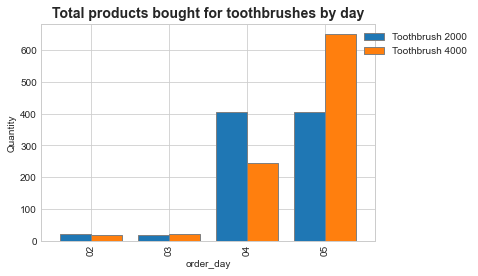

In [27]:
df_1.pivot_table(index='order_day', columns='Toothbrush Type', aggfunc=np.sum ).plot(kind='bar', 
                                                         y='Order Quantity', edgecolor='grey', width = 0.8, 
                                                         ylabel= 'Quantity' ,
                                                         align = 'center'                                                
                                                          )

plt.title('Total products bought for toothbrushes by day', weight = 'bold', fontsize = 14)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.savefig('Products_Sold_By_Day.png', bbox_inches='tight', dpi= 150, facecolor=(1,1,1))
plt.show()


this barchart shows which day got the most sales in December

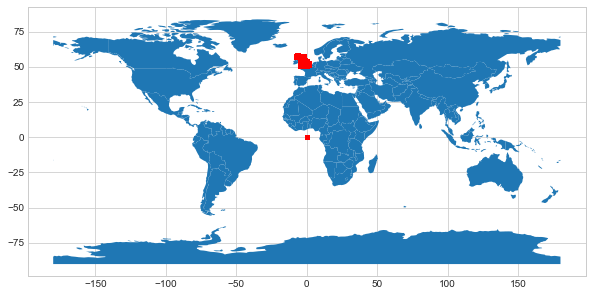

In [30]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
plt.savefig('Coordinates_Map.png', bbox_inches='tight', dpi= 150, facecolor=(1,1,1))

this map shows that sales are mainly in UK but there is an outlier 

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order Number       350 non-null    object
 1   Toothbrush Type    350 non-null    object
 2   Order Date         350 non-null    object
 3   Customer Age       350 non-null    int64 
 4   Order Quantity     350 non-null    int64 
 5   Delivery Postcode  350 non-null    object
 6   Billing Postcode   350 non-null    object
 7   Dispatched Date    350 non-null    object
 8   order_year         350 non-null    object
 9   order_month        350 non-null    object
 10  order_day          350 non-null    object
dtypes: int64(2), object(9)
memory usage: 30.2+ KB


In [19]:
[i for i in range(0,110,10)]

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [20]:
labels = [f'{i} < Age <= {i + 10}' for i in range(0, 110, 10)]

In [21]:
labels

['0 < Age <= 10',
 '10 < Age <= 20',
 '20 < Age <= 30',
 '30 < Age <= 40',
 '40 < Age <= 50',
 '50 < Age <= 60',
 '60 < Age <= 70',
 '70 < Age <= 80',
 '80 < Age <= 90',
 '90 < Age <= 100',
 '100 < Age <= 110']

In [22]:
df_1['AgeGroup'] = pd.cut(df_1['Customer Age'], 
                        bins=[0,10,20,30,40,50,60,70,80,90,100,110], 
                        labels=labels
                        )

<AxesSubplot:>

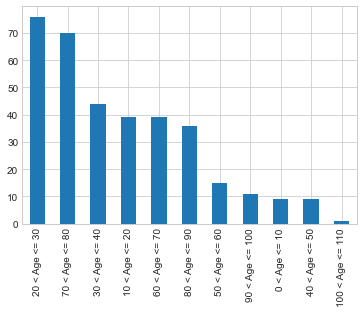

In [23]:
df_1.AgeGroup.value_counts().plot(kind='bar')

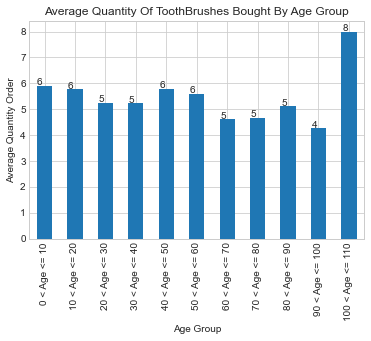

In [31]:
ax = df_1.groupby(['AgeGroup']).mean().dropna()['Order Quantity'].plot(kind='bar', 
                                                               title='Average Quantity Of ToothBrushes Bought By Age Group',
                                                               xlabel='Age Group',
                                                               ylabel='Average Quantity Order')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.savefig('Average_Quantity_By_Age.png', bbox_inches='tight', dpi= 150, facecolor=(1,1,1))

this histogram shows the average quantity toothbrushes that were bought by customers by age group. This histogram shows that on average age group between 100-110 bought the most toothbrushes.